In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from pandas.tools.plotting import scatter_matrix
import math

In [4]:
#### Extracting the data from csv files

In [5]:
classification_data = pd.read_csv("Pizzademand_Classification.csv")
regression_data = pd.read_csv("Pizzademand_Regreesion.csv")

In [6]:
classification_data['PizzaDemand'] = regression_data.PizzaDemand.copy()

In [8]:
#### Plotting scatter matrix

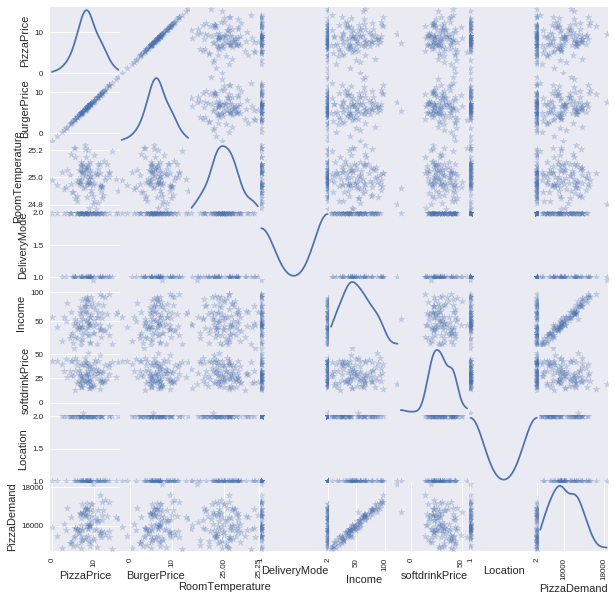

In [38]:
scatter_matrix(classification_data,alpha=0.25, figsize=(10, 10), diagonal='kde', grid=True, marker='*')
plt.show()

In [10]:
#plt.scatter(classification_data.RoomTemperature, classification_data.PizzaDemand, color='c')
#plt.show()

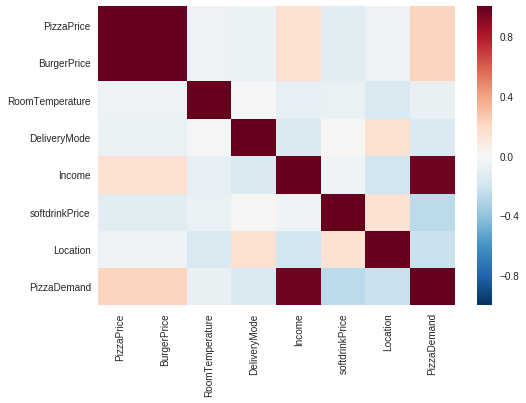

In [37]:
corr = classification_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

In [12]:
data = classification_data.copy()
data_train =  data.loc[:70,:]
data_test =  data.loc[71:,:]
data.head()

,PizzaPrice,BurgerPrice,RoomTemperature,DeliveryMode,Income,softdrinkPrice,Location,Class,PizzaDemand
0,11.716233,9.716233,24.937096,2,21.772162,20.251733,2,Weak,15383.265370
1,8.695689,6.695689,24.772566,1,43.172762,14.877143,1,Good,16036.037969
2,7.056686,5.056686,25.033494,2,18.661751,16.041785,1,Weak,15317.391311
3,12.499111,10.499111,24.978631,1,92.107600,22.401484,1,Good,17327.343321
4,8.208723,6.208723,24.996846,2,51.482776,27.352832,1,Good,16077.301577


## Line of best fit

In [13]:
data_x_train1 = data_train.iloc[:,0:7]
data_y_train1 = data_train.iloc[:,-1]
data_x_test1 = data_test.iloc[:,0:7]
data_y_test1 = data_test.iloc[:,-1]

In [14]:
regr1 = linear_model.LinearRegression()
print(regr1.fit(data_x_train1, data_y_train1))
print("coefficients = ", regr1.coef_, "\nintercept = ",regr1.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
coefficients =  [ -2.05107550e+11   2.05107550e+11   5.42312860e-03   2.65192986e-02
   2.80004425e+01  -1.50022202e+01   2.07240582e-02] 
intercept =  410215114339.0


Score =  0.999999971916
Mean squared error:  0.0152984460675


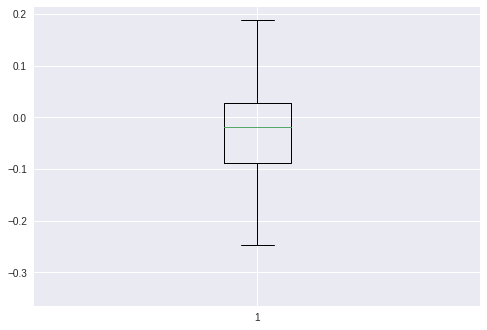

In [40]:
print("Score = ", regr1.score(data_x_test1, data_y_test1))
print("Mean squared error: ",np.mean((regr1.predict(data_x_test1)- data_y_test1)**2) )
plt.boxplot(np.array(regr1.predict(data_x_test1)- data_y_test1),0)
plt.show()


### Feature Selection- drop RoomTemperature

In [41]:
data_x_train2 = data_train.iloc[:,[0,1,3,4,5,6]]
data_y_train2 = data_train.iloc[:,-1]
data_x_test2 = data_test.iloc[:,[0,1,3,4,5,6]]
data_y_test2 = data_test.iloc[:,-1]


In [46]:
regr2 = linear_model.LinearRegression()
regr2.fit(data_x_train2, data_y_train2)
regr2.coef_
regr2.intercept_

14980.965967806529

In [19]:
print("Score = ", regr2.score(data_x_test2, data_y_test2))
print("Mean squared error: ",np.mean((regr2.predict(data_x_test2)- data_y_test2)**2) )
val_resid = regr2.predict(data_x_test2)- data_y_test2

Score =  0.999999972177
Mean squared error:  0.0151559974518


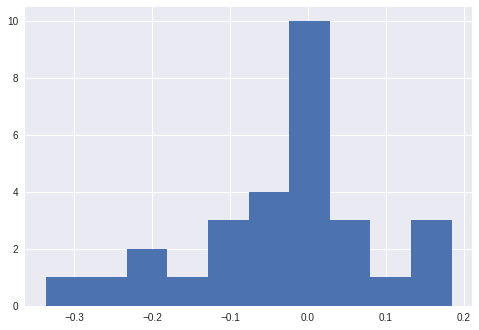

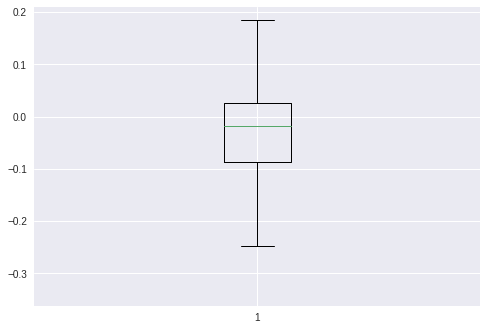

In [47]:


plt.hist(regr2.predict(data_x_test2)- data_y_test2)
plt.show()
plt.boxplot(np.array(regr2.predict(data_x_test2)- data_y_test2),0)
plt.show()


##  Feature Selection : Dropping Location

In [21]:
data_x_train3 = data_train.iloc[:,[0,1,2,4,5,6]]
data_y_train3 = data_train.iloc[:,-1]
data_x_test3 = data_test.iloc[:,[0,1,2,4,5,6]]
data_y_test3 = data_test.iloc[:,-1]
data_x_train3.columns

Index(['PizzaPrice', 'BurgerPrice', 'RoomTemperature', 'Income',
       'softdrinkPrice', 'Location'],
      dtype='object')

In [48]:
regr3 = linear_model.LinearRegression()
regr3.fit(data_x_train3, data_y_train3)

regr3.intercept_

14981.381962230147

In [49]:
regr3.coef_

array([  4.49977372e+00,   4.49977372e+00,  -1.47754967e-02,
         2.80003153e+01,  -1.50020777e+01,   1.97447902e-02])

In [23]:
print("Score = ", regr3.score(data_x_test3, data_y_test3))
print("Mean squared error: ",np.mean((regr3.predict(data_x_test3)- data_y_test3)**2) )
print("Root mean squared error: ", math.sqrt(np.mean((regr3.predict(data_x_test3)- data_y_test3)**2)))

Score =  0.999999971363
Mean squared error:  0.0155994197779
Root mean squared error:  0.12489763719899796


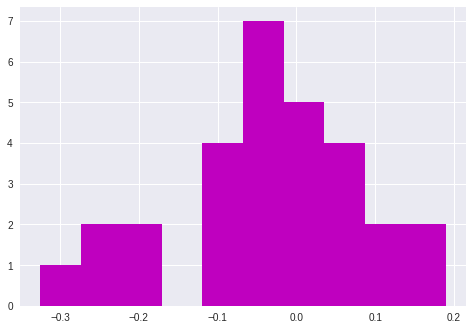

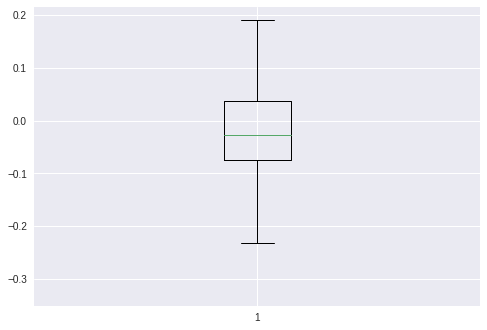

In [50]:


plt.hist(regr3.predict(data_x_test3)- data_y_test3, color='m')
plt.show()
plt.boxplot(np.array(regr3.predict(data_x_test3)- data_y_test3),0)
plt.show()


## Dropping delivery mode , Room Temperature & location 

In [25]:
data_x_train4 = data_train.iloc[:,[0,1,4,5]]
data_y_train4 = data_train.iloc[:,-1]
data_x_test4 = data_test.iloc[:,[0,1,4,5]]
data_y_test4 = data_test.iloc[:,-1]
data_x_train4.columns

Index(['PizzaPrice', 'BurgerPrice', 'Income', 'softdrinkPrice'], dtype='object')

[ -1.26916136e+11   1.26916136e+11   2.80001831e+01  -1.50019836e+01] .... 253832287659.0
Score =  0.999999971652
Mean squared error:  0.0154422530766
Root mean squared error:  0.12426686234290547


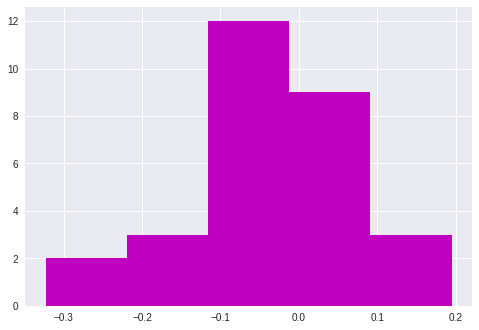

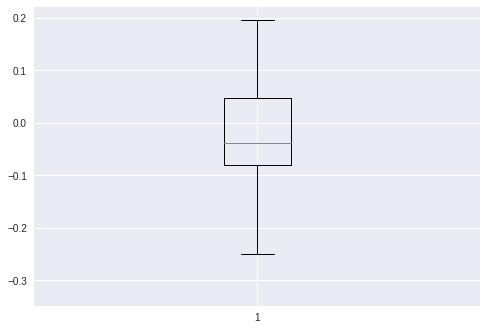

In [52]:
regr4 = linear_model.LinearRegression()
regr4.fit(data_x_train4, data_y_train4)
print(regr4.coef_,"....", regr4.intercept_)
print("Score = ", regr4.score(data_x_test4, data_y_test4))
print("Mean squared error: ",np.mean((regr4.predict(data_x_test4)- data_y_test4)**2) )
print("Root mean squared error: ", math.sqrt(np.mean((regr4.predict(data_x_test4)- data_y_test4)**2)))



plt.hist(regr4.predict(data_x_test4)- data_y_test4, color='m',bins=5)
plt.show()
plt.boxplot(np.array(regr4.predict(data_x_test4)- data_y_test4),0)
plt.show()

## Feature Selection based on pizza price, burger price, income

In [53]:
data_x_train5 = data_train.iloc[:,[1,4,5]]
data_y_train5 = data_train.iloc[:,-1]
data_x_test5 = data_test.iloc[:,[1,4,5]]
data_y_test5 = data_test.iloc[:,-1]


[  8.99994362  28.0002307  -15.00200359] .... 14990.040713
Score =  0.999999971676
Mean squared error:  0.0154288105865
Root mean squared error:  0.12421276337995847


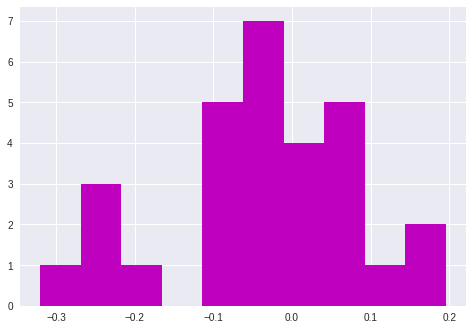

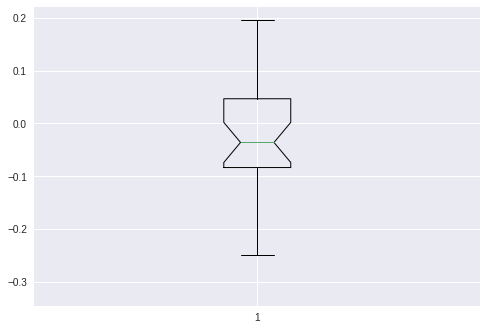

In [55]:
regr5 = linear_model.LinearRegression()
regr5.fit(data_x_train5, data_y_train5)
print(regr5.coef_,"....", regr5.intercept_)
print("Score = ", regr5.score(data_x_test5, data_y_test5))
print("Mean squared error: ",np.mean((regr5.predict(data_x_test5)- data_y_test5)**2) )
print("Root mean squared error: ", math.sqrt(np.mean((regr5.predict(data_x_test5)- data_y_test5)**2)))


plt.hist(regr5.predict(data_x_test5)- data_y_test5, color='m')
plt.show()

plt.boxplot(np.array(regr5.predict(data_x_test5)- data_y_test5),1)
plt.show()

In [29]:
result = sm.ols(formula = "PizzaDemand ~ PizzaPrice + BurgerPrice + RoomTemperature + DeliveryMode + Income + softdrinkPrice + Location", data = data ).fit()

In [30]:
 print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            PizzaDemand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.928e+08
Date:                Thu, 30 Mar 2017   Prob (F-statistic):               0.00
Time:                        11:12:37   Log-Likelihood:                 89.453
No. Observations:                 100   AIC:                            -164.9
Df Residuals:                      93   BIC:                            -146.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4993.4907      0.864   57

In [33]:
result2 = sm.ols(formula = "PizzaDemand ~ PizzaPrice + BurgerPrice  + Income + softdrinkPrice  ", data = data ).fit()

In [34]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            PizzaDemand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.585e+09
Date:                Thu, 30 Mar 2017   Prob (F-statistic):               0.00
Time:                        11:12:37   Log-Likelihood:                 87.835
No. Observations:                 100   AIC:                            -167.7
Df Residuals:                      96   BIC:                            -157.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4993.6685      0.016   3.16e

In [35]:
result3 = sm.ols(formula = "PizzaDemand ~ PizzaPrice  + BurgerPrice + Income + softdrinkPrice  ", data = data ).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:            PizzaDemand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.585e+09
Date:                Thu, 30 Mar 2017   Prob (F-statistic):               0.00
Time:                        11:12:37   Log-Likelihood:                 87.835
No. Observations:                 100   AIC:                            -167.7
Df Residuals:                      96   BIC:                            -157.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4993.6685      0.016   3.16e

In [36]:
import statsmodels.stats.diagnostic as sms

name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(result3.resid, result3.model.exog)
list(zip(name,test))

[('F statistics', 1.3881651806718485), ('p_value', 0.13484747189480351)]